In [1]:
import os
from pathlib import Path
import cdsapi

def download_combined_era5(years, area, output_dir='era5_data'):
    c = cdsapi.Client()
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # File paths
    single_level_file = f"{output_dir}/single_levels_all.nc"
    pressure_level_file = f"{output_dir}/pressure_levels_reduced.nc"

    # --- Single-Level Variables (Expanded) ---
    if os.path.exists(single_level_file):
        print(f"✅ File already exists: {single_level_file}, skipping download.")
    else:
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'format': 'netcdf',
                'variable': [
                    '2m_temperature',  # Surface air temp
                    'mean_sea_level_pressure',  # Atmospheric pressure
                    '10m_u_component_of_wind',  # Wind U-component
                    '10m_v_component_of_wind',  # Wind V-component
                    'total_precipitation',  # Rainfall
                    'total_cloud_cover',  # Cloud cover
                    'surface_solar_radiation_downwards'  # Incoming solar energy
                ],
                'year': [str(y) for y in years],
                'month': [f'{m:02d}' for m in range(1, 13)],  # Keep all months
                'day': [f'{d:02d}' for d in range(1, 32)],    # Keep all days
                'time': ['06:00', '18:00'],                  # Keep both time steps
                'area': area,
                "format": "netcdf"
            },
            single_level_file
        )
        print("✅ Single-level variables downloaded.")

    # --- Pressure-Level Variables (Reduced Set) ---
    if os.path.exists(pressure_level_file):
        print(f"✅ File already exists: {pressure_level_file}, skipping download.")
    else:
        pressure_level_vars = ['temperature', 'geopotential', 'relative_humidity']
        c.retrieve(
            'reanalysis-era5-pressure-levels',
            {
                'product_type': 'reanalysis',
                'format': 'netcdf',
                'variable': pressure_level_vars,
                'pressure_level': ['850', '500'],  # Keep both levels
                'year': [str(y) for y in years],
                'month': [f'{m:02d}' for m in range(1, 13)],
                'day': [f'{d:02d}' for d in range(1, 32)],
                'time': ['06:00', '18:00'],
                'area': area,
                "format": "netcdf"
            },
            pressure_level_file
        )
        print("✅ Reduced pressure-level variables downloaded.")

    print("🎉 ERA5 data download process completed.")

In [2]:
download_combined_era5(
        years=[2022, 2023],
        area=[63, -27, 30, 46],  # North, West, South, East
        output_dir='era5_data'
)

2025-04-04 20:19:27,505 WARNING [2025-04-03T00:00:00] System is in degraded status due to issues on the underlaying infrastructure. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/data-stores-in-degraded-status/12472)
2025-04-04 20:19:27,506 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-04 20:19:27,506 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


✅ File already exists: era5_data/single_levels_all.nc, skipping download.
✅ File already exists: era5_data/pressure_levels_reduced.nc, skipping download.
🎉 ERA5 data download process completed.


In [3]:
import xarray as xr

# Open the NetCDF files using xarray
accum_ds = xr.open_dataset('era5_data/data_stream-oper_stepType-accum.nc')
instant_ds = xr.open_dataset('era5_data/data_stream-oper_stepType-instant.nc')
pressure_ds = xr.open_dataset('era5_data/pressure_levels_reduced.nc')

# Check the available variables
print("Accumulated data variables:", accum_ds.variables)
print("Instantaneous data variables:", instant_ds.variables)
print("Pressure-level data variables:", pressure_ds.variables)

Accumulated data variables: Frozen({'number': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 1460)> Size: 12kB
array(['2022-01-01T06:00:00.000000000', '2022-01-01T18:00:00.000000000',
       '2022-01-02T06:00:00.000000000', ..., '2023-12-30T18:00:00.000000000',
       '2023-12-31T06:00:00.000000000', '2023-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 133)> Size: 1kB
array([63.  , 62.75, 62.5 , 62.25, 62.  , 61.75, 61.5 , 61.25, 61.  , 60.75,
       60.5 , 60.25, 60.  , 59.75, 59.5 , 59.25, 59.  , 58.75, 58.5 , 58.25,
       58.  , 57.75, 57.5 , 57.25, 57.  , 56.75, 56.5 , 56.25, 56.  , 55.75,
       55.5 , 55.25, 55.  , 54.75, 54.5 , 54.25, 54.  , 53.75, 53.5 , 53.25,
  

In [4]:
# Print available variables
print("\n📂 Available Variables in Each Dataset:")
print(f"🔹 Accumulated Dataset: {set(accum_ds.variables.keys())}")
print(f"🔹 Instantaneous Dataset: {set(instant_ds.variables.keys())}")
print(f"🔹 Pressure-Level Dataset: {set(pressure_ds.variables.keys())}")


📂 Available Variables in Each Dataset:
🔹 Accumulated Dataset: {'longitude', 'tp', 'ssrd', 'latitude', 'number', 'valid_time', 'expver'}
🔹 Instantaneous Dataset: {'longitude', 'latitude', 'number', 't2m', 'valid_time', 'expver', 'v10', 'tcc', 'msl', 'u10'}
🔹 Pressure-Level Dataset: {'pressure_level', 'z', 'longitude', 'latitude', 'number', 'valid_time', 'expver', 'r', 't'}


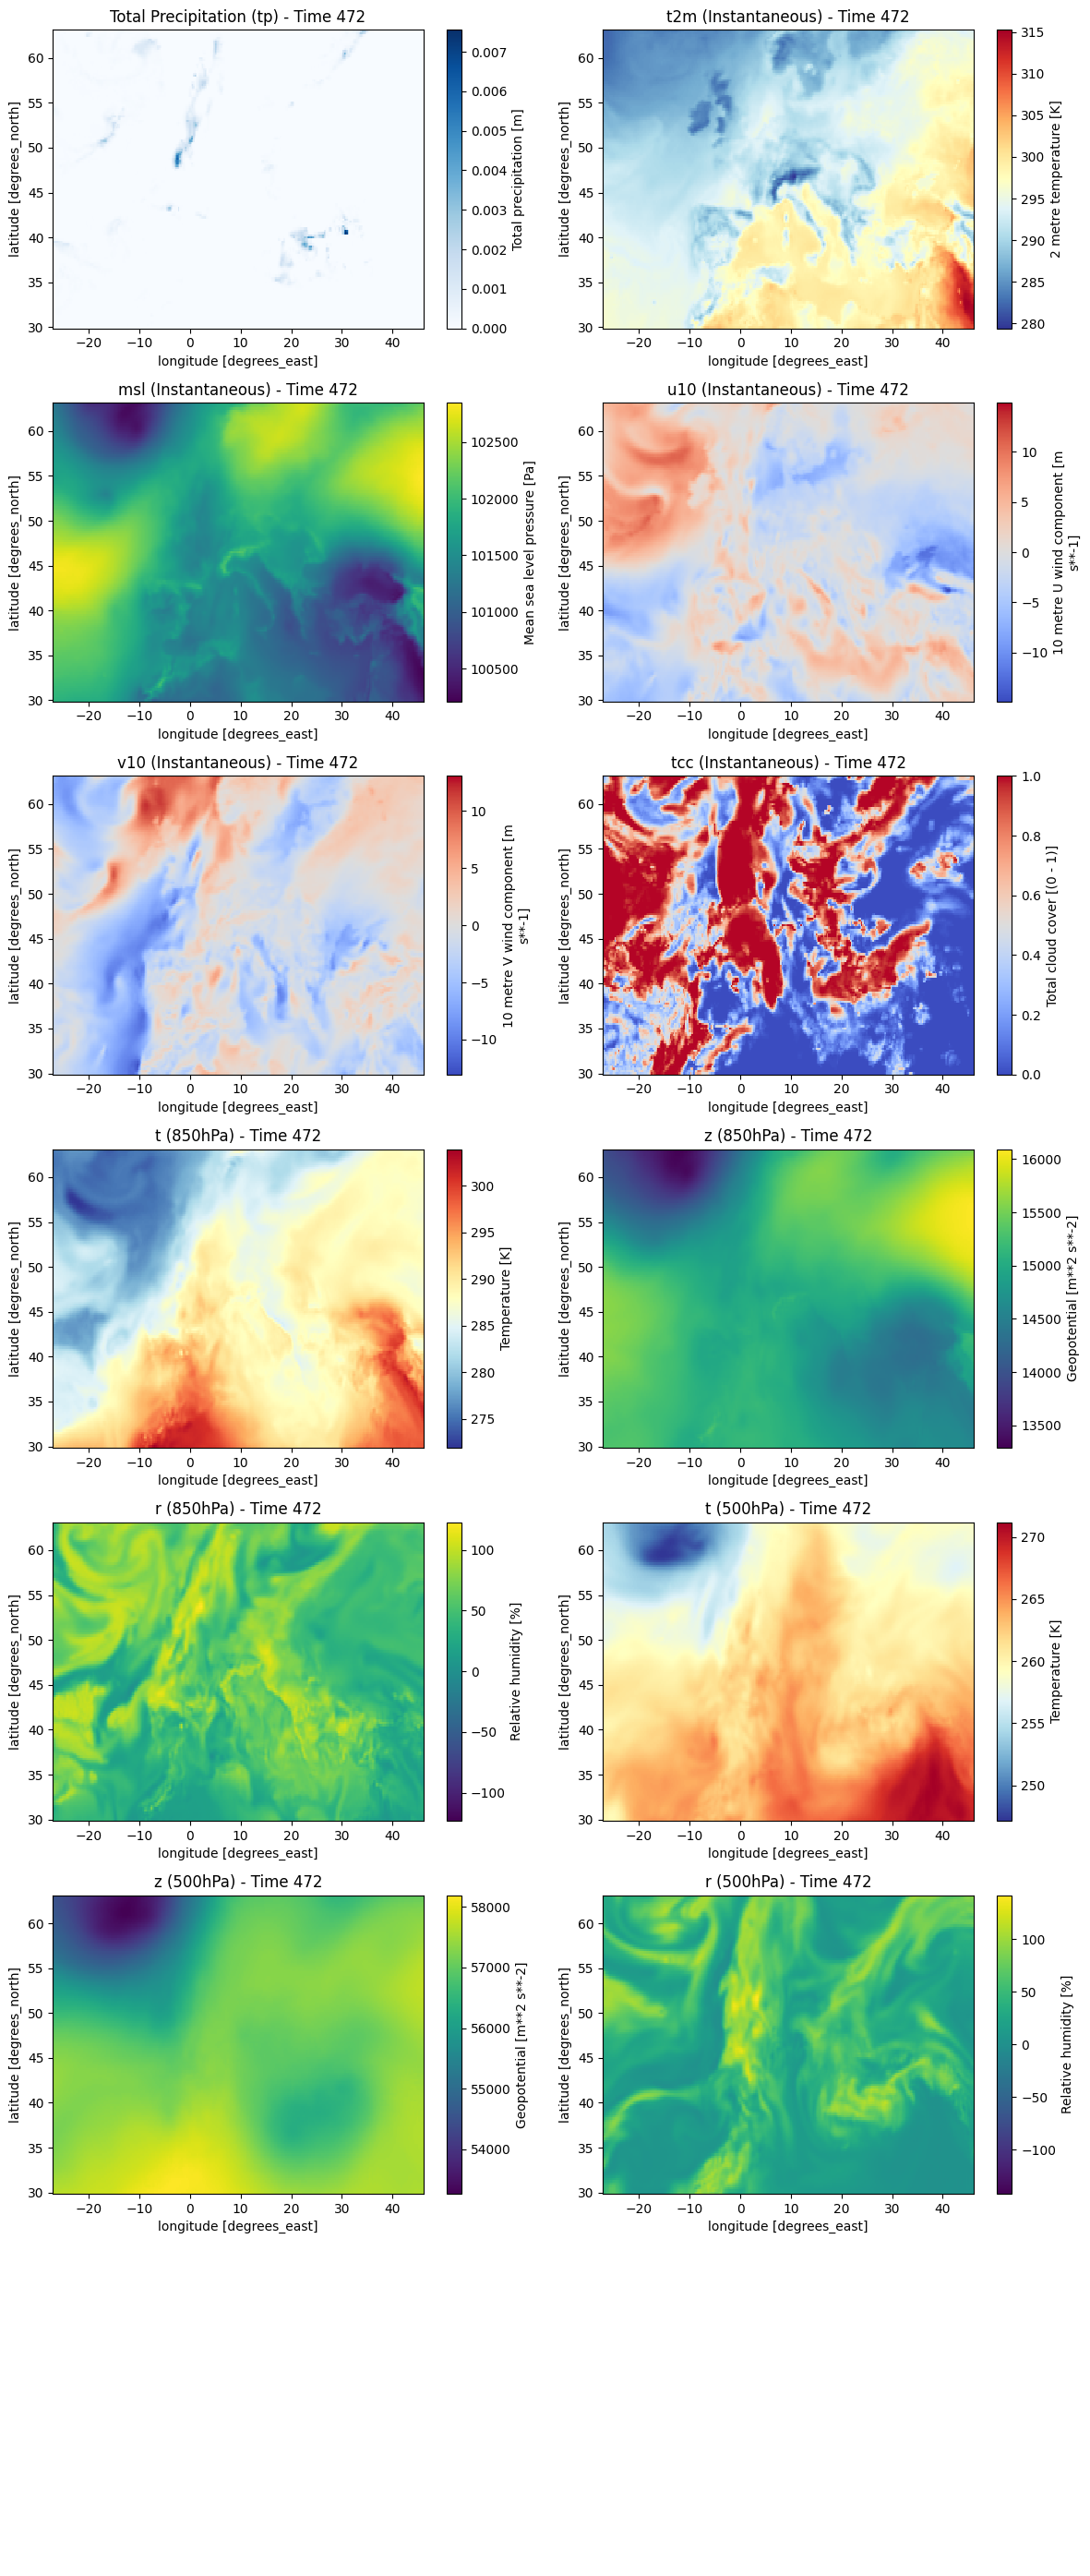

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select an index for valid_time
random_time_index = np.random.randint(0, len(instant_ds['valid_time']))

# Set up the plotting area
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

plot_idx = 0

# (A) Accumulated: Total Precipitation (tp)
data = accum_ds["tp"].isel(valid_time=random_time_index)
data.plot(ax=axes[plot_idx], cmap="Blues")
axes[plot_idx].set_title(f"Total Precipitation (tp) - Time {random_time_index}")
plot_idx += 1

# (B) Instantaneous: t2m, msl, u10, v10, tcc
for var in ["t2m", "msl", "u10", "v10", "tcc"]:
    try:
        data = instant_ds[var].isel(valid_time=random_time_index)
        cmap = "RdYlBu_r" if var == "t2m" else "viridis" if var == "msl" else "coolwarm"
        data.plot(ax=axes[plot_idx], cmap=cmap)
        axes[plot_idx].set_title(f"{var} (Instantaneous) - Time {random_time_index}")
    except KeyError:
        print(f"⚠️ {var} not available at time index {random_time_index}.")
    plot_idx += 1

# (C) Pressure-Level: 850 hPa and 500 hPa
for level, suffix in [(850, "850"), (500, "500")]:
    for var in ["t", "z", "r"]:  # Including temperature (t), geopotential (z), and relative humidity (r)
        try:
            data = pressure_ds[var].sel(pressure_level=level).isel(valid_time=random_time_index)
            cmap = "RdYlBu_r" if var == "t" else "viridis"
            data.plot(ax=axes[plot_idx], cmap=cmap)
            axes[plot_idx].set_title(f"{var} ({level}hPa) - Time {random_time_index}")
        except KeyError:
            print(f"⚠️ {var} not available for {level}hPa at time index {random_time_index}.")
        plot_idx += 1

# Hide unused subplots (if any)
for idx in range(plot_idx, len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()